In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load Data
image_names=[]
output=[]
labels=[]
benign = 0
malignant = 0
# Define Classes
classes={'benign':0,"malignant":1}
for name in classes:
    address='/content/drive/MyDrive/ultrasound_breast_classification/train/'+name
    for add in os.listdir(address):
            image = cv2.imread(address+'/'+add)
            image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype =cv2.CV_8U)
            image_names.append(image)
            output.append(classes[name])
            if classes[name] == 0:
                benign = benign+1
            if classes[name] == 1:
                malignant = malignant + 1
            labels.append(name)

In [ ]:
# Number of images
print("Benign Images :",benign)
print("Malignant Images :",malignant)
print("length of data =",len(image_names), "files=", len(output), "labels=",len(labels))

Benign Images : 3716
Malignant Images : 4442
length of data = 8158 files= 8158 labels= 8158


In [ ]:
## function to plot sample images
def sample_images(images,gray = False):
    figure, axes = plt.subplots(1, 4)
    figure.set_size_inches(35,25)
    axes[0].imshow(images[1],cmap='gray') if gray else axes[0].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
    axes[0].title.set_text("Benign")
    axes[0].axis('off')
    axes[1].imshow(images[55],cmap='gray') if gray else axes[1].imshow(cv2.cvtColor(images[55], cv2.COLOR_BGR2RGB))
    axes[1].title.set_text("Benign")
    axes[1].axis('off')
    axes[2].imshow(images[450],cmap='gray') if gray else axes[2].imshow(cv2.cvtColor(images[450], cv2.COLOR_BGR2RGB))
    axes[2].axis('off')
    axes[2].title.set_text("Malignant")
    axes[3].imshow(images[451],cmap='gray') if gray else axes[3].imshow(cv2.cvtColor(images[451], cv2.COLOR_BGR2RGB))
    axes[3].axis('off')
    axes[3].title.set_text("Malignant")
    plt.show()

In [ ]:
# Look for image shape and type of input images
input_images = image_names
print(np.array(input_images).shape)
print(input_images[10].dtype)

(8158,)
uint8


<ipython-input-6-e685cd50076c>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(input_images).shape)


8158


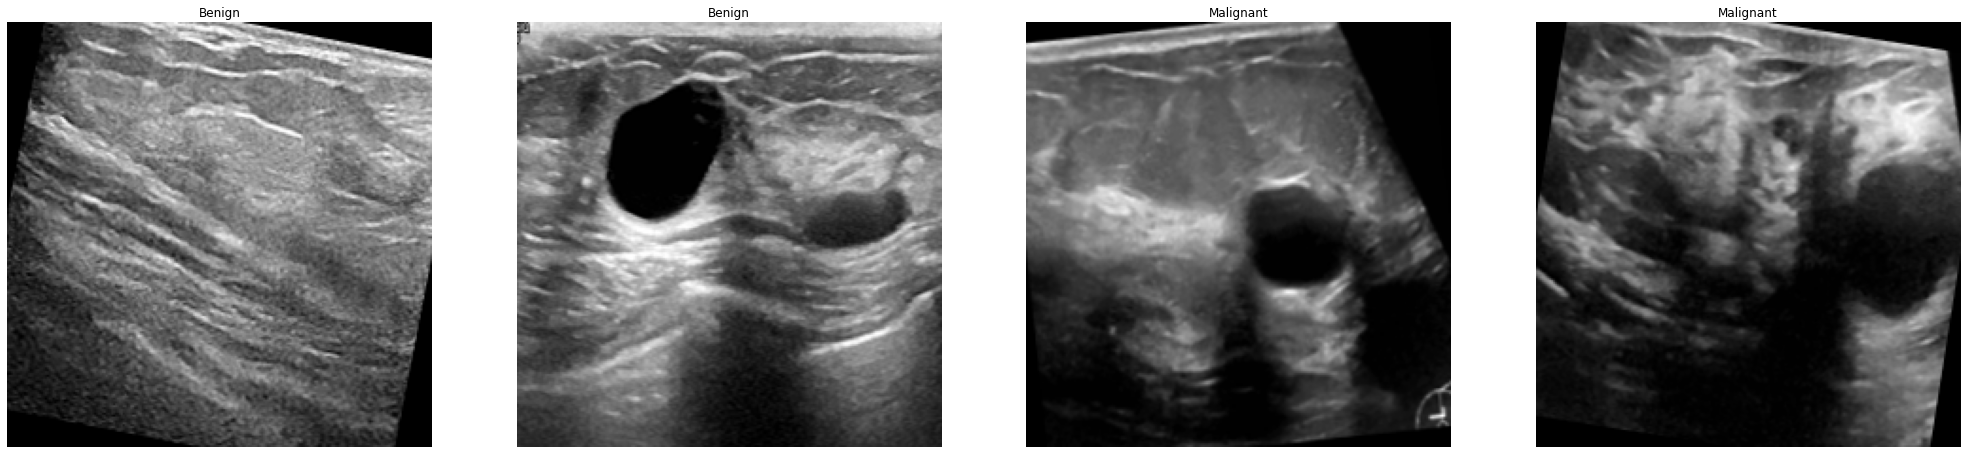

In [ ]:
# Convert the RBG images to gray scale images
grayscale_images = []
grayscale_images.clear()
for idx, image in enumerate(input_images,1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray_image)
print(idx)
sample_images(grayscale_images)

In [ ]:
# HOG Features
from tqdm import tqdm
from skimage.feature import hog
pixels_per_cell = 8
cells_per_block = 4
hog_features=[]
hog_image=[]
for image in tqdm(grayscale_images):
    fd , hogim = hog(image , orientations= 8, pixels_per_cell=(pixels_per_cell , pixels_per_cell) , block_norm='L2' , cells_per_block=(cells_per_block,cells_per_block) , visualize=True)
    hog_image.append(hogim)
    hog_features.append(fd)

100%|██████████| 8158/8158 [12:58<00:00, 10.47it/s]


In [ ]:
fd.min()

0.0

In [ ]:
import pandas as pd
fd = pd.DataFrame(fd)

In [ ]:
fd

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
79995,0.0
79996,0.0
79997,0.0
79998,0.0


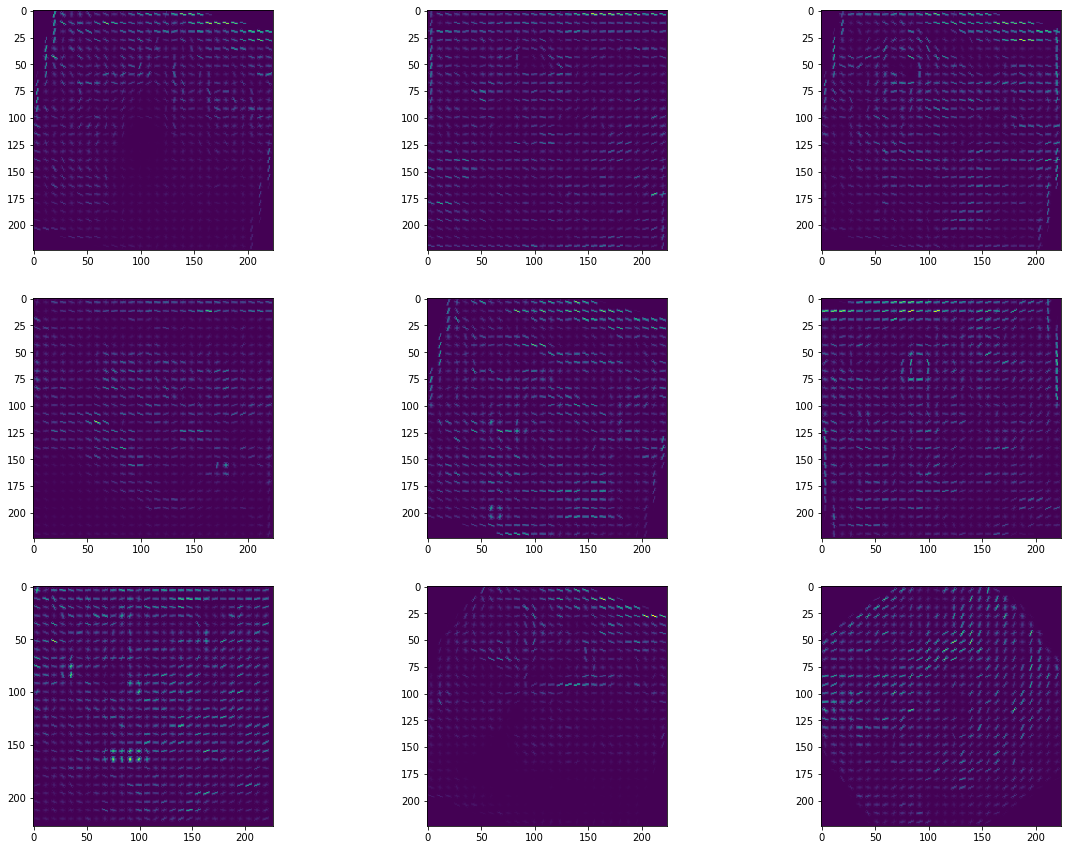

In [ ]:
import random
fig = plt.figure(figsize=(20,15))

for i in range(1,10):
    index = random.randint(1,len(hog_image))
    plt.subplot(3,3,i)
    plt.imshow(hog_image[index])
plt.show()

In [ ]:
# HOG Features
from tqdm import tqdm
from skimage.feature import hog
pixels_per_cell = 8
cells_per_block = 4
hog_features=[]
hog_image=[]
for image in tqdm(grayscale_images):
    fd , hogim = hog(image , orientations= 9, pixels_per_cell=(pixels_per_cell , pixels_per_cell) , block_norm='L2' , cells_per_block=(cells_per_block,cells_per_block) , visualize=True)
    hog_image.append(hogim)
    hog_features.append(fd)

 56%|█████▌    | 4553/8158 [08:06<06:25,  9.35it/s]


KeyboardInterrupt: ignored